In [100]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [333]:
t = np.linspace(0,1,100)

sig = 5*np.sin(2*3.14*2*t) + 2*np.random.rand(100)

In [294]:
mov = 0

In [295]:
sdvig=np.zeros(18)
nol=np.zeros(72)
sig=np.concatenate((nol,sig),axis=0)
sig

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

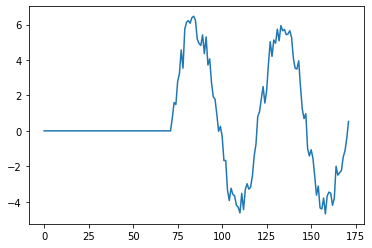

In [296]:
plt.plot(sig)

In [4]:
def wavelet(X):
    
    #h = [0.7071067811865476,0.7071067811865476]
    #g = [-0.7071067811865476,0.7071067811865476]
    
    g = [-0.026670057900950818,0.18817680007762133,-0.5272011889309198,0.6884590394525921,-0.2811723436604265,
                -0.24984642432648865,0.19594627437659665,0.12736934033574265,-0.09305736460380659,-0.07139414716586077,
                0.02945753682194567,0.03321267405893324,-0.0036065535669883944,-0.010733175482979604,-0.0013953517469940798,
                0.00199240529499085,0.0006858566950046825,-0.0001164668549943862,-9.358867000108985e-05,-1.326420300235487e-05]
    h = [-1.326420300235487e-05,9.358867000108985e-05,-0.0001164668549943862,-0.0006858566950046825,0.00199240529499085,
                0.0013953517469940798,-0.010733175482979604,0.0036065535669883944,0.03321267405893324,-0.02945753682194567,
                -0.07139414716586077,0.09305736460380659,0.12736934033574265,-0.19594627437659665,-0.24984642432648865,
                0.2811723436604265,0.6884590394525921,0.5272011889309198,0.18817680007762133,0.026670057900950818]

    W = np.zeros([len(X),len(X)])
    
    low_pass = np.zeros_like(X)
    high_pass = np.zeros_like(X)
    low_pass[0:len(h)] = h
    high_pass[0:len(g)] = g
    
    low_pass = list(low_pass)
    high_pass = list(high_pass)
    
    for i in range(0,len(X),2):
        W[i,:] = low_pass
        W[i+1,:] = high_pass
        
        low_pass[0:2], low_pass[2:] = low_pass[-2:], low_pass[:-2]
        high_pass[0:2], high_pass[2:] = high_pass[-2:], high_pass[:-2]
    
    a = np.matmul(W,np.transpose(X))
    
    return a[::2], a[1::2]

In [6]:
def inverse_wavelet(low,high):
    a = np.zeros(len(low)*2)
    a[::2] = low
    a[1::2] = high
    
    g = [0.026670057900950818,-1.326420300235487e-05,0.5272011889309198,-0.0001164668549943862,0.2811723436604265,
         0.00199240529499085,-0.19594627437659665,-0.010733175482979604,0.09305736460380659,0.03321267405893324,
         -0.02945753682194567,-0.07139414716586077,0.0036065535669883944,0.12736934033574265,0.0013953517469940798,
         -0.24984642432648865,-0.0006858566950046825,0.6884590394525921,9.358867000108985e-05,0.18817680007762133]
    h = [0.18817680007762133,-9.358867000108985e-05,0.6884590394525921,0.0006858566950046825,-0.24984642432648865,
         -0.0013953517469940798,0.12736934033574265,-0.0036065535669883944,-0.07139414716586077,0.02945753682194567,
         0.03321267405893324,-0.09305736460380659,-0.010733175482979604,0.19594627437659665,0.00199240529499085,
         -0.2811723436604265,-0.0001164668549943862,-0.5272011889309198,-1.326420300235487e-05,-0.026670057900950818]

    
    W = np.zeros([len(a),len(a)])
    
    low_pass = np.zeros_like(a)
    high_pass = np.zeros_like(a)
    low_pass[0:len(h)] = h
    high_pass[0:len(g)] = g

    low_pass = list(low_pass)
    high_pass = list(high_pass)
    
    for i in range(0,len(a),2):
        W[i,:] = low_pass
        W[i+1,:] = high_pass
        
        low_pass[0:2], low_pass[2:] = low_pass[-2:], low_pass[:-2]
        high_pass[0:2], high_pass[2:] = high_pass[-2:], high_pass[:-2]
    
    X = np.matmul(W,np.transpose(a))
    
    return X

In [297]:
low,high = wavelet(sig)
rec_sig = np.concatenate((sdvig,inverse_wavelet(low,high)),axis=0)

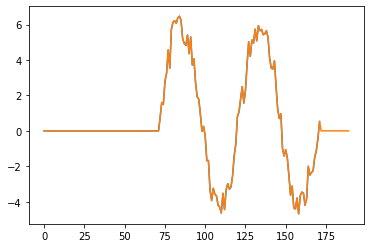

In [298]:
plt.plot(sig) 
plt.plot(rec_sig)

In [299]:
if len(low)%2!=0:
    low=np.insert(low,0,0)
    high=np.insert(high,0,0)
    mov+=2

In [300]:
low2,high2 = wavelet(low)
if len(low2)%2!=0:
    low2=np.insert(low2,0,0)
    high2=np.insert(high2,0,0)
    mov+=2

rec_sig=np.concatenate((sdvig,inverse_wavelet(low2,high2)),axis=0)
if mov!=0:
    rec_sig=rec_sig[2:]


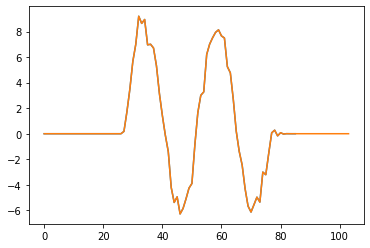

In [302]:
plt.plot(low)
plt.plot(rec_sig)

In [303]:
high=np.concatenate((high,sdvig),axis=0)
rec_sig2=np.concatenate((sdvig,inverse_wavelet(rec_sig,high)),axis=0)

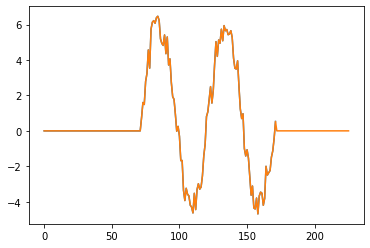

In [304]:
plt.plot(sig)
plt.plot(rec_sig2)

In [356]:
def DWT(signal,level):
    signal=np.concatenate((np.zeros(18*(2**level)),sig),axis=0)
    nechet=np.zeros(level+1)
    Low_and_High = [level+1]
    Low_and_High[0] = (signal,0)
    for i in range (1,level+1):
        Low, High = wavelet(Low_and_High[i-1][0])
        if len(Low)%2!=0:
            Low=np.insert(Low,0,0)
            High=np.insert(High,0,0)
            nechet[i]=1
        Low_and_High.append((Low,High))
    return Low_and_High, nechet,signal
        
        

In [399]:
Low_and_High, nechet,signal = DWT(sig,10)

In [381]:
nechet

array([0., 0., 1., 1., 1., 0.])

In [396]:
def Rev_DWT(Low_and_High,level,nechet):
    rec_sig=np.concatenate((sdvig,inverse_wavelet(Low_and_High[level][0],Low_and_High[level][1])),axis=0)
    if nechet[-1]==1:
        rec_sig=rec_sig[2:]
    chel =1 
    for i in range (level-1,0,-1):
        print(i)
        mov = np.zeros(18*(chel))
        chel=chel+2**(level-i)
        high = np.concatenate((Low_and_High[i][1],mov),axis=0)
        rec_sig=np.concatenate((sdvig,inverse_wavelet(rec_sig,high)),axis=0)
        if nechet[i]==1:
            rec_sig=rec_sig[2:]
    return rec_sig

In [400]:
rec_sig_fin = Rev_DWT(Low_and_High,10,nechet)

9
8
7
6
5
4
3
2
1


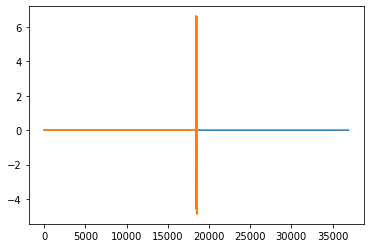

In [404]:
plt.plot(rec_sig_fin)
plt.plot(signal)